# Variational Autoencoders

We extended mixture models and HMMs to have continuous latent variables, and we found that when we assumed linear relationships and Gaussian noise, a lot of the math simplified! However, these are pretty strict modeling assumptions: what if there are nonlinear relationships between latent variables and observations and/or non-Gaussian noise? Here, we will relax these constraints with a class of latent variable models called **variational autoencoders (VAEs)**


## PCA as a Linear Autoencoder

Last time we introduced PCA as a method for finding dimensions of maximal variance. However, we can arrive at the same model from another perspective: find the linear projection that minimizes the average projection cost, defined as the mean squared distance between the data points and their projections (Pearson, 1903).
    
To formalize this, let
\begin{align*}
    \mbW = 
    \begin{bmatrix}
    | & & | \\
    \mbw_1 & \cdots & \mbw_M \\
    | & & |
    \end{bmatrix} \in \reals^{D \times M} \quad \text{with} \quad \mbW^\top \mbW = \mbI
\end{align*}
be an orthogonal basis for the principal subspace. 

We will **encode** each data point by subtracting the mean and projecting onto the principal subspace to obtain $\mbz_n = \mbW^\top (\mbx_n - \bar{\mbx})$. 

Since $\mbW$ is an orthogonal matrix, all we need to do to **decode** the encoded data point is multiply $\mbW \mbz_n$ and add back the mean. That gives us, 
\begin{align*}
    \hat{\mbx}_n = \mbW \mbz_n + \bar{\mbx} = \mbW \mbW^\top (\mbx_n - \bar{\mbx}) + \bar{\mbx}.
\end{align*}

**Goal:** Find an orthogonal matrix $\mbW$ that _minimizes_ the mean squared reconstruction error,
\begin{align*}
    \cL(\mbW) &= \frac{1}{N} \sum_{n=1}^N \|\mbx_n - \hat{\mbx}_n\|_2^2
\end{align*}
We can write this in matrix notation instead. Let $\mbX \in \reals^{N \times D}$ be the _centered data matrix_ with rows $(\mbx_n - \bar{\mbx})^\top$.
Then,
\begin{align*}
    \cL(\mbW) 
    &= \frac{1}{N} \Tr[(\mbX - \hat{\mbX})^\top (\mbX - \hat{\mbX})] \\
    &= \frac{1}{N} \Tr[(\mbX - \mbX \mbW \mbW^\top)^\top (\mbX - \mbX \mbW \mbW^\top)] \\
    &= \frac{1}{N} \Tr[(\mbX(\mbI - \mbW \mbW^\top))^\top (\mbX (\mbI - \mbW \mbW^\top))]\\
    &= \frac{1}{N} \Tr[(\mbI - \mbW \mbW^\top)^\top \mbX^\top \mbX (\mbI - \mbW \mbW^\top)] \\
    &= \Tr[(\mbI - \mbW \mbW^\top)^\top \mbS (\mbI - \mbW \mbW^\top)]
\end{align*}
where $\mbS = \frac{1}{N} \mbX^\top \mbX$ is the sample covariance matrix.

Now apply the circular trace property,
\begin{align*}
    \cL(\mbW) 
    &= \Tr[\mbS (\mbI - \mbW \mbW^\top) (\mbI - \mbW \mbW^\top)^\top]
\end{align*}

:::{admonition} Question
What does $(\mbI - \mbW \mbW^\top) (\mbI - \mbW \mbW^\top)^\top$ equal? 
Note that $\mbI - \mbW \mbW^\top$ is a projection matrix &mdash; it projects a vector onto the _nullspace_ of $\mbW$. Applying the projection operator twice doesn't change the result. Mathematically,
\begin{align*}
    (\mbI - \mbW \mbW^\top) (\mbI - \mbW \mbW^\top)^\top 
    = \mbI - 2 \mbW \mbW^\top + \mbW \mbW^\top \mbW \mbW^\top
    = \mbI - \mbW \mbW^\top
\end{align*}
where we used the fact that $\mbW^\top \mbW = \mbI$ since $\mbW$ is an orthogonal matrix.
:::

Thus, the objective simplifies to,
\begin{align*}
    \cL(\mbW) 
    = \Tr[\mbS(\mbI - \mbW \mbW^\top)]
    = \Tr[\mbS] - \Tr[\mbS \mbW \mbW^\top]
    = \mathrm{const} - \Tr[\mbW^\top \mbS \mbW].
\end{align*}
Let $\mbU \mbLambda \mbU^\top$ be the eigendecomposition of $\mbS$. (Since it is a covariance matrix, the eigenvectors are orthogonal.) 
Plugging in,
\begin{align*}
    \cL(\mbW) 
    &= \mathrm{const} - \Tr[\mbW^\top \mbU \mbLambda \mbU^\top \mbW] \\
    &= \mathrm{const} - \Tr\left[\mbW^\top \left( \sum_{d=1}^D \lambda_d \mbu_d \mbu_d^\top \right) \mbW\right] \\
    &= \mathrm{const} - \sum_{m=1}^M \sum_{d=1}^D \lambda_d \mbw_m^\top \mbu_d \mbu_d^\top \mbw_m \\
    &= \mathrm{const} - \sum_{m=1}^M \sum_{d=1}^D \lambda_d (\mbw_m^\top \mbu_d)^2
\end{align*}
We want to minimize $\cL(\mbW)$ subject to $\mbW$ being orthogonal. What is the solution? $\mbW = \mbU_M$!


### Probabilistic PCA as a Stochastic Linear Autoencoder

The jump from PCA to probabilistic PCA was to treat the scores, $\mbz_n$, as latent variables. We gave them a Gaussian prior and assumed a generative model,
\begin{align*}
    \mbz_n &\iid{\sim} \mathrm{N}(\mbzero, \mbI) \\
    \mbx_n \mid \mbz_n &\sim \mathrm{N}(\mbW \mbz + \mbmu, \sigma^2 \mbI),
\end{align*}
where $\mbz_n \in \reals^M$ is a latent variable, $\mbW \in \reals^{D \times M}$ are the weights, $\mbmu \in \reals^D$ is the bias parameter, and $\sigma^2 \in \reals_+$ is a variance. 

Given the parameters, we showed that the posterior distribution over latent variables is,
\begin{align*}
p(\mbz_n \mid \mbx_n; \mbtheta)
&=
\mathrm{N}(\mbz_n \mid (\sigma^2 \mbI + \mbW^\top \mbW)^{-1} \mbW^\top (\mbx_n - \mbmu), \, \sigma^2 (\sigma^2 \mbI + \mbW^\top \mbW)^{-1}),
\end{align*}
and when $\sigma^2 \to 0$ and $\mbW$ are the PCs, this converges to a delta function on the PCA scores.

To simplify notation, let's rewrite the posterior as,
\begin{align*}
p(\mbz_n \mid \mbx_n; \mbtheta)
&= \mathrm{N}(\mbz_n \mid \mbE \mbx_n + \mbd, \mbG)
\end{align*}
where 
\begin{align*}
\mbE &= (\sigma^2 \mbI + \mbW^\top \mbW)^{-1} \mbW^\top \\
\mbd &= - (\sigma^2 \mbI + \mbW^\top \mbW)^{-1} \mbW^\top \mbmu \\
\mbG &= \sigma^2 (\sigma^2 \mbI + \mbW^\top \mbW)^{-1}.
\end{align*}

To "autoencode" the data using probabilistic PCA, we could sample $\mbz_n \sim p(\mbz_n \mid \mbx_n; \mbtheta)$ by mapping $\mbx_n \mapsto \mbE \mbx_n + \mbd$ and adding Gaussian noise with covariance $\mbG$. Then we can generate a new data point $\hat{\mbx}_n \sim p(\cdot \mid \mbW \mbz_n + \mbmu, \sigma^2 \mbI)$. Just as PCA could be motivated as finding weights that minimize the reconstruction error, probabilistic PCA can be seen as finding weights that minimize the _expected_ reconstruction error (subject to a little regularization).



### Revisiting EM for Probabilistic PCA

Recall that we justified EM by connecting it to variational inference. We showed that EM maximizes the evidence lower bound (ELBO),
\begin{align*}
\cL(q, \mbtheta) 
&= \sum_n \mathbb{E}_{q(\mbz_n)}\left[\log p(\mbx_n, \mbz_n; \mbtheta) - \log q(\mbz_n) \right] \\
&= \sum_n \underbrace{\mathbb{E}_{q(\mbz_n)}\left[\log p(\mbx_n \mid \mbz_n; \mbtheta)\right]}_{\text{expected log likelihood}} - \underbrace{\KL{q(\mbz_n)}{p(\mbz_n)}}_{\text{KL to the prior}} \\
&\leq \sum_n \log p(\mbx_n; \mbtheta)
\end{align*} 
EM can be seen as coordinate ascent on the ELBO: 
1. The E-step sets $q$ to the posterior over latent variables, $q(\mbz_n) = p(\mbz_n \mid \mbx_n; \mbtheta)$ for the current parameters $\mbtheta$.
2. The M-step updates the parameters to maximize the expected log joint probability.

In probabilistic PCA, maximizing the expected log likelihood is the same as minimizing the expected reconstruction error. Plugging in the definition of the model and the posterior,
\begin{align*}
\mathbb{E}_{q(\mbz_n)}\left[\log p(\mbx_n \mid \mbz_n; \mbtheta)\right]
&= \E_{\mathrm{N}(\mbz_n \mid \mbE \mbx_n + \mbd, \mbG)}\left[\log \mathrm{N}(\mbx_n \mid \mbW \mbz_n + \mbmu, \sigma^2 \mbI) \right] \\
&= -\frac{1}{2\sigma^2 }\E_{\mathrm{N}(\mbz_n \mid \mbE \mbx_n + \mbd, \mbG)}\left[\|\mbx_n - \mbW \mbz_n - \mbmu \|_2^2 \right] + \log \sigma + c \\
\end{align*}
where $c$ is an additive constant, and $\mbE$, $\mbd$, $\mbG$ are functions of the parameters, as defined above, 

We can't forget about the KL to the prior though! When we maximize the ELBO, we are essentially finding weights that minimize the expected reconstruction error, while also not deviating too far from the standard normal prior on the latent variables.


## Variational Autoencoders

Variational Autoencodres (VAEs) are "deep" but conceptually simple generative models. Rather than assuming linear relationships, we will allow for **nonlinear** mappings between latent variables and observations. 

To sample a data point $\mbx_n$,
1. First, sample **latent variables** $\mbz_n$,
\begin{align*}
    \mbz_n &\sim \mathrm{N}(\mbzero, \mbI) 
\end{align*}

2. Then sample the data point $\mbx_n$ from a conditional distribution with mean,
\begin{align*}
    \E[\mbx_n \mid \mbz_n] &= g(\mbz_n; \mbtheta),
\end{align*}
where $g: \reals^H \to \reals^D$ is a nonlinear mapping parameterized by $\mbtheta$.

We will assume $g$ is a simple **feedforward neural network** of the form,
\begin{align*}
    g(\mbz; \mbtheta) &= g_L(g_{L-1}(\cdots g_1(\mbz) \cdots))
\end{align*}
where each **layer** is a cascade of a linear mapping followed by an element-wise nonlinearity (except for the last layer, perhaps). For example,
\begin{align*}
    g_\ell(\mbu_{\ell}) = \mathrm{relu}(\mbW_\ell \mbu_{\ell} + \mbb_\ell); \qquad \mathrm{relu}(a) = \max(0, a).
\end{align*}
The generative parameters consist of the weights and biases, $\mbtheta = \{\mbW_\ell, \mbb_\ell\}_{\ell=1}^L$.




### Learning and Inference

We have two goals. The **learning goal** is to find the parameters that **maximize the marginal likelihood of the data**,
\begin{align*}
    \mbtheta^\star 
    &= \arg \max_{\mbtheta} p(\mbX; \mbtheta)\\
    &= \arg \max_{\mbtheta} \prod_{n=1}^N \int p(\mbx_n \mid \mbz_n; \mbtheta) \, p(\mbz_n; \mbtheta) \dif \mbz_n
\end{align*}
    
The **inference goal** is to find the **posterior distribution of latent variables**,
\begin{align*}
    p(\mbz_n \mid \mbx_n; \mbtheta) 
    &= \frac{p(\mbx_n \mid \mbz_n; \mbtheta) \, p(\mbz_n; \mbtheta)}{\int p(\mbx_n \mid \mbz_n'; \mbtheta) \, p(\mbz_n'; \mbtheta)\dif \mbz_n'}
\end{align*}

Both goals require an integral over $\mbz_n$, but that is intractable for deep generative models.




### The Evidence Lower Bound (ELBO)

**Idea:** Use the ELBO to get a bound on the marginal probability and maximize that instead.
\begin{align*}
\log p(\mbX ; \mbtheta) 
&= \sum_{n=1}^N \log p(\mbx_n; \mbtheta) \\
&\geq \sum_{n=1}^N \log p(\mbx_n; \mbtheta) - \KL{q(\mbz_n; \mblambda_n)}{p(\mbz_n \mid \mbx_n; \mbtheta)} \\
&= \sum_{n=1}^N \underbrace{\E_{q(\mbz_n)}\left[ \log p(\mbx_n, \mbz_n; \mbtheta) - \log q(\mbz_n; \mblambda_n) \right]}_{\text{"local ELBO"}} \\
&\triangleq \sum_{n=1}^N \cL_n(\mblambda_n, \mbtheta) \\
&= \cL(\mblambda, \mbtheta)
\end{align*}
where $\mblambda = \{\mblambda_n\}_{n=1}^N$. 

Here, I've written the ELBO as a sum of _local ELBOs_ $\cL_n$.



### Variational Inference
The ELBO is still maximized (and the bound is tight) when each $q$ is equal to the true posterior,
\begin{align*}
    q(\mbz_n; \mblambda_n) &= p(\mbz_n \mid \mbx_n, \mbtheta).
\end{align*}
Unfortunately, the posterior no longer has a simple, closed form.

:::{admonition} Question
Suppose $\mbx_n \sim \mathrm{N}(g(\mbz_n; \mbtheta), \mbI)$. This deep generative model has a Gaussian prior on $\mbz_n$ and a Gaussian likelihood for $\mbx_n$ given $\mbz_n$. Why isn't the posterior Gaussian?
:::

Nevertheless, we can still constrain $q$ to belong to a simple family. For example, we could constrain it to be Gaussian and seek the best Gaussian approximation to the posterior. This is sometimes called **fixed-form variational inference**. Let,
\begin{align*}
    \cQ = \left\{q: q(\mbz; \mblambda) = \mathrm{N}\big(\mbz \mid \mbmu, \diag(\mbsigma^2)\big) \text{ for } \mblambda = (\mbmu, \log \mbsigma^2) \in \reals^{2H} \right\}
\end{align*}

Then, for fixed parameters $\mbtheta$, the best $q$ in this **variational family** is,
\begin{align*}
    q^\star 
    &= \arg \min_{q \in \cQ} \KL{q(\mbz_n; \mblambda_n)}{p(\mbz_n \mid \mbx_n; \mbtheta)} \\
    &= \arg \max_{\mblambda_n \in \reals^{2H}} \cL_n(\mblambda_n, \mbtheta).
\end{align*}




### Variational Expectation-Maximization (vEM)
Now we can introduce a new algorithm.

:::{prf:algorithm} Variational EM (vEM)
Repeat until either the ELBO or the parameters converges:
1. **M-step:** Set $\mbtheta \leftarrow \arg \max_{\mbtheta} \cL(\mblambda, \mbtheta)$
2. **E-step:** Set $\mblambda_n \leftarrow \arg \max_{\mblambda_n \in \mbLambda} \cL_n(\mblambda_n, \mbtheta)$ for $n=1,\ldots,N$
3. Compute (an estimate of) the ELBO $\cL(\mblambda, \mbtheta)$.
:::

In general, none of these steps will have closed form solutions, so we'll have to use approximations. 




### Generic M-step with Stochastic Gradient Ascent

For exponential family mixture models, the M-step had a closed form solution. For deep generative models, we need a more general approach.
    
If the parameters are unconstrained and the ELBO is differentiable wrt $\mbtheta$, we can use stochastic gradient ascent. 
\begin{align*}
    \mbtheta &\leftarrow \mbtheta + \alpha \nabla_{\mbtheta} \cL(q, \mbtheta) \\
    &= \mbtheta + \alpha \sum_{n=1}^N \mathbb{E}_{q(\mbz_n; \mblambda_n)} \left[ \nabla_{\mbtheta} \log p(\mbx_n, \mbz_n; \mbtheta) \right]
\end{align*}
    
Note that the expected gradient wrt $\mbtheta$ can be computed using ordinary Monte Carlo --- nothing fancy needed!
    


### The Variational E-step
    
Assume $\cQ$ is the family of Gaussian distributions with diagonal covariance:
\begin{align*}
    \cQ = \left\{q: q(\mbz; \mblambda) = \mathrm{N}\big(\mbz \mid \mbmu, \diag(\mbsigma^2)\big) \text{ for } \mblambda = (\mbmu, \log \mbsigma^2) \in \reals^{2H} \right\}
\end{align*}
This family is indexed by **variational parameters** $\mblambda_n = (\mbmu_n, \log \mbsigma_n^2) \in \reals^{2H}$.
    
To perform SGD, we need an unbiased estimate of the gradient of the local ELBO, but
\begin{align*}
\nabla_{\mblambda_n} \cL_n(\mblambda_n, \mbtheta) 
&= \nabla_{\mblambda_n} \E_{q(\mbz_n; \mblambda_n)} \left[ \log p(\mbx_n, \mbz_n; \mbtheta) - \log q(\mbz_n; \mblambda_n) \right] \\
&\textcolor{red}{\neq} \;  \E_{q(\mbz_n; \mblambda_n)} \left[ \nabla_{\mblambda_n} \left(\log p(\mbx_n, \mbz_n; \mbtheta) - \log q(\mbz_n; \mblambda_n)\right) \right].
\end{align*}



### Reparameterization Trick
One way around this problem is to use the **reparameterization trick**, aka the **pathwise gradient estimator**. Note that,
\begin{align*}
    \mbz_n \sim q(\mbz_n; \mblambda_n) \quad \iff \quad
    \mbz_n &= r(\mblambda_n, \mbepsilon), \quad \mbepsilon \sim \mathrm{N}(\mbzero, \mbI) 
\end{align*}
where $r(\mblambda_n, \mbepsilon) = \mbmu_n + \mbsigma_n \mbepsilon$ is a reparameterization of $\mbz_n$ in terms of parameters $\mblambda_n$ and noise $\mbepsilon$.

We can use the **law of the unconscious statistician** to rewrite the expectations as,
\begin{align*}
    \E_{q(\mbz_n; \mblambda_n)} \left[h(\mbx_n, \mbz_n, \mbtheta, \mblambda_n) \right]
    &= \E_{\mbepsilon \sim \mathrm{N}(\mbzero, \mbI)} \left[h(\mbx_n, r(\mblambda_n, \mbepsilon), \mbtheta, \mblambda_n) \right]
\end{align*}
where 
\begin{align*}
h(\mbx_n, \mbz_n, \mbtheta, \mblambda_n) = \log p(\mbx_n, \mbz_n; \mbtheta) - \log q(\mbz_n; \mblambda_n).
\end{align*} 
The distribution that the expectation is taken under no longer depends on the parameters $\mblambda_n$, so we can simply take the gradient inside the expectation,
\begin{align*}
    \nabla_{\mblambda} \E_{q(\mbz_n; \mblambda_n)} \left[h(\mbx_n, \mbz_n, \mbtheta, \mblambda_n) \right]
    &=  \E_{\mbepsilon \sim \mathrm{N}(\mbzero, \mbI)} \left[\nabla_{\mblambda_n} h(\mbx_n, r(\mblambda_n, \mbepsilon), \mbtheta, \mblambda_n) \right]
\end{align*}
Now we can use Monte Carlo to obtain an unbiased estimate of the final expectation!
<!-- \begin{align*}
    \widehat{\nabla}_{\mblambda} \E_{q(\mbtheta; \mblambda)} \left[h(\mbtheta, \mblambda) \right]
    &= \frac{1}{M} \sum_{m=1}^M \nabla_{\mblambda} h(r(\mblambda, \mbepsilon_m), \mblambda); & \epsilon_m \iid{\sim} \mathrm{N}(\mbzero, \mbI)
\end{align*} -->
    
    
<!-- \item Last lecture we introduced the score-function and pathwise gradient estimators to tackle this problem. For example,
\begin{align*}
\nabla_{\mblambda_n} \cL_n(\mblambda_n, \mbtheta) 
&= \nabla_{\mblambda_n} \E_{q(\mbz_n; \mblambda_n)} \left[ \log p(\mbx_n, \mbz_n; \mbtheta) - \log q(\mbz_n; \mblambda_n) \right] \\
&= \E_{\mbepsilon_n \sim \mathrm{N}(\mbzero, \mbI)} \left[ \nabla_{\mblambda_n} \left(\log p(\mbx_n, r(\mblambda_n, \mbepsilon_n); \mbtheta) - \log q(r(\mblambda_n, \mbepsilon_n); \mblambda_n)\right) \right]
\end{align*}
where $r(\mblambda_n, \mbepsilon_n) = \mbmu_n + \mbsigma_n \mbepsilon_n$. -->



### Working with mini-batches of data
We can view the ELBO as an expectation over data indices,
\begin{align*}
    \cL(\mblambda, \mbtheta) 
    &= \sum_{n=1}^N \cL_n(\mblambda_n, \mbtheta) \\
    &= N \, \E_{n \sim \mathrm{Unif}([N])}[\cL_n(\mblambda_n, \mbtheta)].
\end{align*}
We can use Monte Carlo to approximate the expectation (and its gradient) by drawing **mini-batches** of data points at random.

In practice, we often cycle through mini-batches of data points deterministically. Each pass over the whole dataset is called an **epoch.**




### Algorithm
Now we can add some detail to our variational expectation maximization algorithm.

:::{prf:algorithm} Variational EM (with the reparameterization trick)

For epoch $i=1,\ldots,\infty$:

For $n=1,\ldots,N$:
    
1. Sample $\epsilon_n^{(m)} \iid{\sim} \mathrm{N}(\mbzero, \mbI)$ for $m=1,\ldots,M$.

2. **M-Step**:

    a. Estimate
    \begin{align*}
    \hat{\nabla}_{\mbtheta} \cL_n(\mblambda_n, \mbtheta)
    &= 
    \frac{1}{M} \sum_{m=1}^M \left[ \nabla_{\mbtheta} \log p(\mbx_n, r(\mblambda_n, \mbepsilon_n^{(m)}); \mbtheta) \right]
    \end{align*}
    
    b. Set $\mbtheta \leftarrow \mbtheta + \alpha_i N \hat{\nabla}_{\mbtheta} \cL_n(\mblambda_n, \mbtheta)$

3. **E-step:** 

    a. Estimate 
    \begin{align*}
    \hat{\nabla}_{\mblambda} \cL_n(\mblambda_n, \mbtheta) 
    &= \frac{1}{M} \sum_{m=1}^M \nabla_{\mblambda} \left[\log p(\mbx_n, r(\mblambda_n, \mbepsilon_n^{(m)}); \mbtheta) - \log q(r(\mblambda_n, \mbepsilon_n^{(m)}), \mblambda_n) \right]
    \end{align*} 
    
    b. Set $\mblambda_n \leftarrow \mblambda_n + \alpha_i \hat{\nabla}_{\mblambda} \cL_n(\mblambda_n, \mbtheta)$.

4. Estimate the ELBO 
    \begin{align*}
    \hat{\cL}(\mblambda, \mbtheta) 
    &= \frac{N}{M} \sum_{m=1}^M \log p(\mbx_n, r(\mblambda_n, \mbepsilon_n^{(m)}); \mbtheta) - \log q(r(\mblambda_n, \mbepsilon_n^{(m)}); \mblambda_n)
    \end{align*}

5. Decay step size $\alpha_i$ according to schedule.
:::




### Amortized Inference

Note that vEM involves optimizing separate variational parameters $\mblambda_n$ for each data point. For large datasets where we are optimizing using mini-batches of data points, this leads to a strange asymmetry: we update the generative model parameters $\mbtheta$ every mini-batch, but we only update the variational parameters for the $n$-th data point once per epoch. Is there any way to share information across data points?

Note that the optimal variational parameters are just a function of the data point and the model parameters,
\begin{align*}
    \mblambda_n^\star &= \arg \min_{\mblambda_n} \KL{q(\mbz_n; \mblambda_n)}{p(\mbz_n \mid \mbx_n, \mbtheta)} 
    \triangleq f^\star(\mbx_n, \mbtheta).
\end{align*}
for some implicit and generally nonlinear function $f^\star$.

VAEs learn an approximation to $f^\star(\mbx_n, \mbtheta)$ with an **inference network**, a.k.a. **recognition network** or **encoder**.
    
The inference network is (yet another) neural network that takes in a data point $\mbx_n$ and outputs variational parameters $\mblambda_n$,
\begin{align*}
    \mblambda_n & \approx f(\mbx_n, \mbphi),
\end{align*}
where $\mbphi$ are the weights of the network.
    
The advantage is that the inference network shares information across data points &mdash; it _amortizes_ the cost of inference, hence the name. The disadvantage is the output will not minimize the KL divergence. However, in practice we might tolerate a worse variational posterior and a weaker lower bound if it leads to faster optimization of the ELBO overall.




### Putting it all together
Logically, I find it helpful to distinguish between the E and M steps, but with recognition networks and stochastic gradient ascent, the line is blurred.

The final algorithm looks like this. 

:::{prf:algorithm} Variational EM (with amortized inference)

Repeat until either the ELBO or the parameters converges:

1. Sample data point $n \sim \mathrm{Unif}(1, \ldots, N)$. [Or a minibatch of data points.]

2. Estimate the local ELBO $\cL_n(\mbphi, \mbtheta)$ with Monte Carlo. [Note: it is a function of $\mbphi$ instead of $\mblambda_n$.]

3. Compute unbiased Monte Carlo estimates of the gradients $\widehat{\nabla}_{\mbtheta} \cL_n(\mbphi, \mbtheta)$ and $\widehat{\nabla}_{\mbphi} \cL_n(\mbphi, \mbtheta)$. 
[The latter requires the reparameterization trick.]

3. Set
\begin{align*}
    \mbtheta &\leftarrow \mbtheta + \alpha_i \widehat{\nabla}_{\mbtheta} \cL_n(\mbphi, \mbtheta) \\
    \mbphi &\leftarrow \mbphi + \alpha_i \widehat{\nabla}_{\mbphi} \cL_n(\mbphi, \mbtheta)
\end{align*}
with step size $\alpha_i$ decreasing over iterations $i$ according to a valid schedule.

:::

## Demo: Neural Networks and VAEs

In this demo, we will explore automatic differentiation, neural networks, and amortized variational inference. PyTorch makes it easy to construct such networks and train them with backpropagation. We'll give you a few examples to help get you started.



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.distributions import Normal
from torch.distributions.kl import kl_divergence
from torch.utils.data import DataLoader

torch.manual_seed(305)
sns.set_context("notebook")

### Part 1: Regression with Deep Neural Networks

We'll start off with a simple regressoin problem: train a neural network to approximate the function $g(z) = \sin(z)$. We'll give the network lots of noisy observations $(z_n, x_n)$ where $x_n \sim \mathcal{N}(g(z_n), \sigma^2)$. We'll use a simple feedforward network and train it with SGD.

#### Simulate data

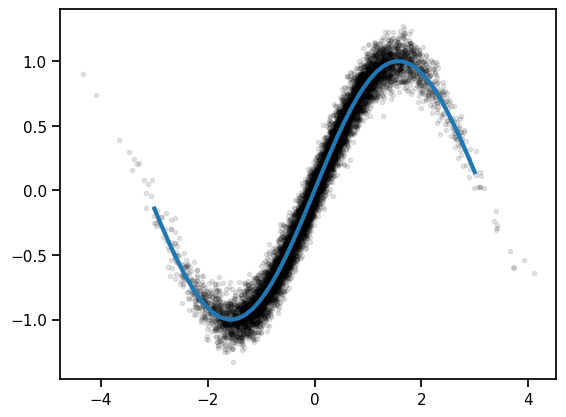

In [2]:
# Construct the dataset
torch.manual_seed(0)
N = 10000
sigma = 0.1
zs = torch.randn(N)
xs = torch.sin(zs) + sigma * torch.randn(N)

z_grid = torch.linspace(-3, 3, 50)
plt.plot(zs, xs, 'k.', alpha=0.1)
plt.plot(z_grid, torch.sin(z_grid), lw=3)

#### Construct a feedforward neural network

This code implements a simple feedforward neural network class that inherits from `nn.Module`. Modules implement a `forward` function that maps inputs to outputs. The class variables (`self.fc1` and `self.fc2` are Modules themselves, each with their own parameters. When it comes to training the network, we can use the `parameters()` function to get the list of trainable parameters - this function introspects on each of the class variables and extracts the parameters associated with each layer.

_Note:_ for simple networks like this one, PyTorch offers a [`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) object that saves you a few lines of code. Here we've built the module from scratch to show the more general approach. We'll extend this module in Part 2.

In [8]:
class SimpleNet(nn.Module):
    """A simple feedforward neural network
    """

    def __init__(self, layer_size=20):
        super().__init__()
        
        # Construct linear "fully connected" (fc) layers
        self.fc1 = nn.Linear(in_features=1, out_features=layer_size)
        self.fc2 = nn.Linear(in_features=layer_size, out_features=1)

    def forward(self, z):
        """ Implements the forward pass of the network.

        Args:
            z: torch.tensor of shape (N,)
        Returns:
            preds: torch.tensor of shape (N,) containing the predictions
        """
        # Note we have to unsqueeze the inputs to make them explicitly 1D
        h1 = F.relu(self.fc1(z.unsqueeze(1)))
        # Note we have to squeeze the outputs to make them explicitly 0D
        preds = self.fc2(h1).squeeze(1)
        return preds

# Construct an instance of the model. It will be given with random weights 
# per PyTorch's default initialization strategy.
model = SimpleNet()

#### Plot the predictions of the randomly initialized model

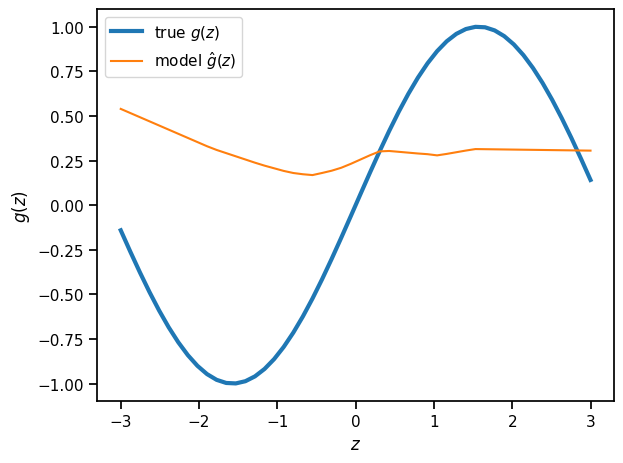

In [9]:
plt.plot(z_grid, torch.sin(z_grid), lw=3, label=r"true $g(z)$")
plt.plot(z_grid, model.forward(z_grid).detach(), label=r"model $\hat{g}(z)$") 
plt.xlabel(r"$z$")
plt.ylabel(r"$g(z)$")
plt.legend()
_ = plt.tight_layout()

#### Optimize the model parameters to maximize the likelihood

The log likelihood in this model is,

$$
\begin{align*}
\log p(\mathbf{x} \mid \mathbf{z}, \theta, \sigma^2) 
&= \sum_{n=1}^N \log \mathcal{N}(x_n \mid g(z_n; \theta), \sigma^2) \\
&= -\frac{1}{2\sigma^2} \sum_{n=1}^N \| x_n - g(z_n; \theta) \|_2^2 + c
\end{align*}
$$

where $g: \mathbb{R} \mapsto \mathbb{R}$ is a neural network with parameters $\theta$. 

Maximizing the log likelihood is equivalent to **minimizing the mean squared error**,

$$
\begin{align*}
\mathcal{L}(\theta) &= \frac{1}{N} \sum_{n=1}^N \| x_n - g(z_n; \theta) \|_2^2 
\end{align*}
$$

The code below minimizes this objective using Adam, a stochastic optimization algorithm.

In [10]:
# Next we define a loss function to minimize. In our case, we want this 
# to be related to the log likelihood of ys given xs, which is proportional
# to the mean squared error of the predictions.
loss_fn = torch.nn.MSELoss(reduction='mean')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algorithms. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
num_iters = 2000
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(num_iters):
    # Forward pass: compute predicted y by passing x to the model.
    x_pred = model(zs)

    # Compute and print loss.
    loss = loss_fn(x_pred, xs)
    if t % 100 == 99:
        print("Iter", t, ": ", loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its parameters
    optimizer.step()

Iter 99 :  0.11238071322441101
Iter 199 :  0.03940815478563309
Iter 299 :  0.024931667372584343
Iter 399 :  0.019917594268918037
Iter 499 :  0.016875959932804108
Iter 599 :  0.014812312088906765
Iter 699 :  0.013398522511124611
Iter 799 :  0.012412039563059807
Iter 899 :  0.011727896519005299
Iter 999 :  0.011278469115495682
Iter 1099 :  0.010972524993121624
Iter 1199 :  0.010763496160507202
Iter 1299 :  0.01062475610524416
Iter 1399 :  0.010529364459216595
Iter 1499 :  0.010458740405738354
Iter 1599 :  0.010412151925265789
Iter 1699 :  0.010380692780017853
Iter 1799 :  0.010358535684645176
Iter 1899 :  0.010342140682041645
Iter 1999 :  0.01033094059675932


#### Plot the trained model's predictions

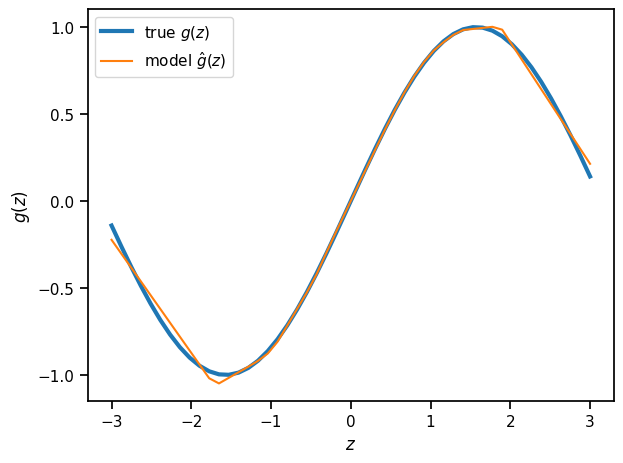

In [11]:
z_grid = torch.linspace(-3, 3, 50)
x_pred = model.forward(z_grid)

# We have to "detach" the predictions from the computation graph
# before we can plot them.
x_pred = x_pred.detach()

plt.plot(z_grid, torch.sin(z_grid), lw=3, label=r"true $g(z)$")
plt.plot(z_grid, x_pred, label=r"model $\hat{g}(z)$")
plt.xlabel(r"$z$")
plt.ylabel(r"$g(z)$")
plt.legend()
plt.tight_layout()

:::{admonition} Exercises
:class: tip

1. Add another layer to the SimpleNet
2. Try predicting beyond the range of the training data. What do the predictions look like?
3. Swap out the rectified linear (relu) activation with another nonlinearity, like the sigmoid or the GELU activation.
4. Try different optimizers (SGD with and without momentum, RMSProp)
:::

### Part 2: Variational Autoencoders

In this section, we will train a variational autoencoder for a simple synthetic data. This is essentially a generalization of the sinusoidal regression problem from above. Here, the data is generated from,

$$
\begin{align*}
z_n &\sim \mathcal{N}(0, 1) \\
x_n &\sim \mathcal{N}(g(z_n), \sigma^2 I) 
\end{align*}
$$

where 

$$
\begin{align*}
g(z) = \begin{bmatrix} \cos(z) \\ \sin(z) \end{bmatrix}
\end{align*}
$$

Thus, the data is essentially lives near a 1D nonlinear manifold (here, a circle).

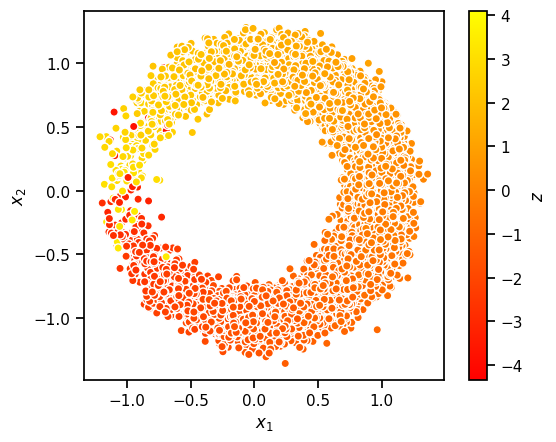

In [15]:
# Construct the dataset
torch.manual_seed(0)
N = 20000
sigma = 0.1
zs = torch.randn(N)
xs = torch.column_stack([torch.cos(zs), 
                         torch.sin(zs)]) + sigma * torch.randn((N, 2))

z_grid = torch.linspace(-3, 3, 50)
plt.scatter(xs[:,0], xs[:,1], c=zs, cmap="autumn", ec='w')
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.gca().set_aspect("equal")
plt.colorbar(label=r"$z$")

#### Make a simple data loader for this dataset

Data loaders are convenience wrappers for iterating over minibatches of data points.

In [20]:
train_dataloader = DataLoader(xs[:(3*N//4)], batch_size=1000, shuffle=True)
test_dataloader = DataLoader(xs[(3*N//4):], batch_size=1000, shuffle=True)

#### Part 2a: Decoder Network

Implement a decoder that maps $\mathbb{R} ↦ \mathbb{R}^2$ with a 2 layer decoder.

In [17]:
# Define decoder architecture
class Decoder(nn.Module):
    """ Neural network defining p(x | z) """

    def __init__(self, data_dim, latent_dim, hidden_dims=[20, 20], noise_scale=0.1):
        super().__init__()
        self.data_dim = data_dim
        self.noise_scale = noise_scale

        self.fc1 = nn.Linear(latent_dim, hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], data_dim)

    def forward(self, z):
        """ Computes means of p(x | z).
        Args:
            z: (N, latent_dim) torch.tensor
        Returns:
            Normal distribution
        """
        h1 = F.relu(self.fc1(z))
        h2 = F.relu(self.fc2(h1))
        preds = self.fc3(h2)
        return Normal(preds, self.noise_scale)

#### Problem 2b: Encoder Network

We will estimate the parameters of the generative model by maximizing the Evidence Lower Bound (ELBO). As the exact posterior $p(\mathbf{z} \mid \mathbf{x})$ is unknown, we will use an approximate, amortized posterior $q_{\boldsymbol{\phi}}(\mathbf{z} \mid \mathbf{x}) = \mathcal{N}(\mathbf{z} \mid \mu_{\boldsymbol{\phi}}(\mathbf{x}), \text{diag}(\sigma^2_{\boldsymbol{\phi}}(\mathbf{x})))$. We let $\left(\mu_{\boldsymbol{\phi}}(\mathbf{x}), \log \sigma^2_{\boldsymbol{\phi}}(\mathbf{x}) \right) = E_{\boldsymbol{\phi}}(\mathbf{x})$ where $E_{\boldsymbol{\phi}}: \mathbb{R}^{2} \to \mathbb{R}^1 \times \mathbb{R}^1$ is a neural network with parameters $\boldsymbol{\phi}$. 

As above, we parametrize $E_{\boldsymbol{\phi}}$ as a neural network with two layers of hidden units and ReLU activations. We use 20 hidden units in the first layer and 20 in the second. Then we let $\mu_{\boldsymbol{\phi}}$ and $\log \sigma^2_{\boldsymbol{\phi}}$ be affine functions of the hidden layer activations. Implement the encoder $E_{\boldsymbol{\phi}}$ in the code below.

In [16]:
# Define encoder architecture
class Encoder(nn.Module):
    """ Neural network defining q(z | x). """

    def __init__(self, data_dim, latent_dim, hidden_dims=[20, 20]):
        super().__init__()
        self.latent_dim = latent_dim

        self.fc1 = nn.Linear(data_dim, hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.fc31 = nn.Linear(hidden_dims[1], latent_dim)
        self.fc32 = nn.Linear(hidden_dims[1], latent_dim)

    def forward(self, x):
        """ Computes normal distribution q(z | x)

        Args:
            x: (N, data_dim) torch.tensor
        Returns:
            Normal distribution
        """
        h1 = F.relu(self.fc1(x))
        h2 = F.relu(self.fc2(h1))
        means = self.fc31(h2)
        log_sigmasqs = self.fc32(h2)
        sigmas = torch.exp(0.5 * log_sigmasqs)
        return Normal(means, sigmas)

#### Problem 2c: Implement the ELBO


In class we derived the local ELBO and showed that it can be written as the **expected log likelihood** minus the **KL divergence to the prior**. With the reparameterization trick for a Gaussian variational posterior, this is:

$$
\begin{align*}
\mathcal{L}_n(\boldsymbol{\theta}, \boldsymbol{\phi}) 
&= \mathbb{E}_{q_{\boldsymbol{\phi}}(\mathbf{z}_n \mid \mathbf{x}_n)} \left[ \log p_{\boldsymbol{\theta}}(\mathbf{x}_n \mid \mathbf{z}_n) \right] - \text{KL}\left( q_{\boldsymbol{\phi}}(\mathbf{z}_n \mid \mathbf{x}_n) \mid\mid p(\mathbf{z}_n)\right) \\
&= \mathbb{E}_{\boldsymbol{\epsilon} \sim \mathcal{N}(\mathbf{0}, \mathbf{I})} \left[ \log p_{\boldsymbol{\theta}}(\mathbf{x}_n \mid \mu_{\boldsymbol{\phi}}(\mathbf{x}_n) + \boldsymbol{\epsilon} \odot \sigma_{\boldsymbol{\phi}}(\mathbf{x}_n)) \right] - \text{KL}\left( q_{\boldsymbol{\phi}}(\mathbf{z}_n \mid \mathbf{x}_n) \mid\mid p(\mathbf{z}_n)\right)
\end{align*}
$$

(Though we have written the local ELBO as a function of $\boldsymbol{\theta}$ and $\boldsymbol{\phi}$ only, note that it is of course also a function of the data point $\mathbf{x}_n$.


Implement the estimator of the ELBO $\hat{\mathcal{L}}(\boldsymbol{\theta}, \boldsymbol{\phi})$. We assume sampling of the data point (or minibatch of data points) `x` is done outside of the function, but you must sample the noise variables $\boldsymbol{\epsilon}$ within the `elbo` function. You should use the `kl_divergence` function imported above to analytically compute the KL divergence between the Gaussian distributions $q_{\boldsymbol{\phi}}(\mathbf{z} \mid \mathbf{x})$ and $p(\mathbf{z})$. Make sure you use `rsample` on a `Distribution` object to use the reparametrization trick and not `sample`.

In [18]:
def elbo(x, encoder, decoder):
    """ Computes a stochastic estimate of the rescaled evidence lower bound

    Args:
        x: (N, data_dim) torch.tensor
        encoder: an Encoder
        decoder: a Decoder
    Returns:
        elbo: a (,) torch.tensor containing the estimate of the ELBO
    """
    p_z = Normal(0, 1)
    q_z = encoder.forward(x)
    
    # eps = Normal(0, 1).sample()
    # z = q_z.mean + q_z.scale * eps
    
    z = q_z.rsample()
    elbo = decoder.forward(z).log_prob(x).sum(dim=1).mean(dim=0)
    elbo -= kl_divergence(q_z, p_z).sum(dim=1).mean(dim=0)
    return elbo

#### Implement the Training Loop [given]

Using our `Encoder` and `Decoder` definitions, as well as the `elbo` function, we have provided training code below. This code uses the [Adam](https://arxiv.org/abs/1412.6980) optimizer, an optimization algorithm which uses the history of past gradients to rescale gradients before applying an update.

In [23]:
encoder = Encoder(data_dim=2, latent_dim=1)
decoder = Decoder(data_dim=2, latent_dim=1)
optimizer = torch.optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=3e-4)

num_epochs = 500
train_elbos = []
test_elbos = []
for epoch in range(num_epochs):
    encoder.train()
    decoder.train()
    train_elbo = 0
    for batch_idx, x in enumerate(train_dataloader):
        optimizer.zero_grad()

        loss = -elbo(x, encoder, decoder)  
        loss.backward()
        train_elbo -= loss.item() * len(x)
        optimizer.step()
            
    encoder.eval()
    decoder.eval()
    test_elbo = 0
    with torch.no_grad():
        for x in test_dataloader:
            test_elbo += elbo(x, encoder, decoder).item() * len(x)
            
    train_elbo /= len(train_dataloader.dataset)
    test_elbo /= len(test_dataloader.dataset)
    train_elbos.append(train_elbo)
    test_elbos.append(test_elbo)

    if epoch % 10 == 0:
        print('====> Epoch: {} Average ELBO: {:.4f} Test ELBO: {:.4f}'.format(
            epoch, train_elbo, test_elbo))

train_elbos = torch.tensor(train_elbos)
test_elbos = torch.tensor(test_elbos)

====> Epoch: 0 Average ELBO: -42.8449 Test ELBO: -41.2845
====> Epoch: 10 Average ELBO: -30.4301 Test ELBO: -29.8750
====> Epoch: 20 Average ELBO: -26.8994 Test ELBO: -25.7263
====> Epoch: 30 Average ELBO: -11.3469 Test ELBO: -11.1683
====> Epoch: 40 Average ELBO: -6.6239 Test ELBO: -6.5473
====> Epoch: 50 Average ELBO: -3.6565 Test ELBO: -3.7647
====> Epoch: 60 Average ELBO: -2.6703 Test ELBO: -2.9213
====> Epoch: 70 Average ELBO: -2.2387 Test ELBO: -2.5268
====> Epoch: 80 Average ELBO: -1.9867 Test ELBO: -2.2507
====> Epoch: 90 Average ELBO: -1.8371 Test ELBO: -2.0181
====> Epoch: 100 Average ELBO: -1.7141 Test ELBO: -1.9378
====> Epoch: 110 Average ELBO: -1.5808 Test ELBO: -1.7112
====> Epoch: 120 Average ELBO: -1.5208 Test ELBO: -1.7370
====> Epoch: 130 Average ELBO: -1.4237 Test ELBO: -1.6050
====> Epoch: 140 Average ELBO: -1.3649 Test ELBO: -1.5087
====> Epoch: 150 Average ELBO: -1.3454 Test ELBO: -1.5176
====> Epoch: 160 Average ELBO: -1.2842 Test ELBO: -1.4928
====> Epoch: 170 

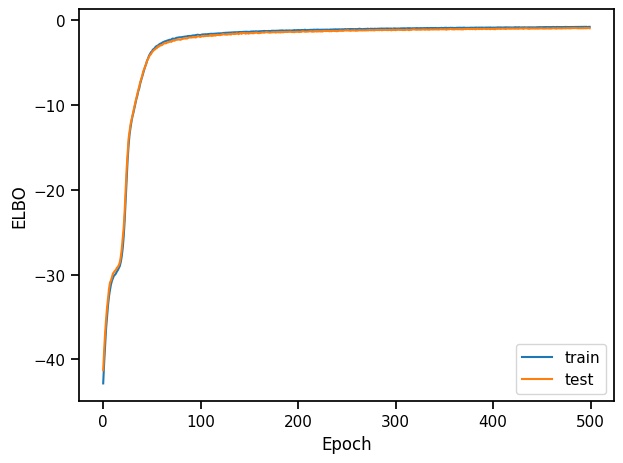

In [24]:
plt.plot(train_elbos, label="train")
plt.plot(test_elbos, label="test")
plt.xlabel("Epoch")
plt.ylabel("ELBO")
plt.legend()
plt.tight_layout()

#### Problem 2d: Visualize samples from the trained model

In addition to the ELBO, we can sample from the trained model to assess its performance. Use the code below to generate an $8 \times 8$ grid of sampled digits from the model. Note that we follow the common practice of using the mean of $p_{\boldsymbol{\theta}}(\mathbf{x} \mid \mathbf{z})$ rather than resampling from this distribution when visualizing samples. Critique these samples. What aspects of the data distribution does the model seem to have trouble learning?

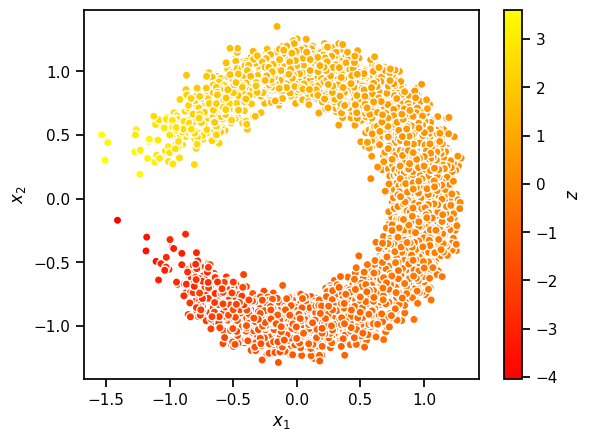

In [26]:
# Visualize sampled digits from our model
decoder.eval()
with torch.no_grad():
    x = torch.randn(10000,1)
    samples = decoder.forward(x).sample()
    
plt.scatter(samples[:, 0], samples[:, 1], c=x[:, 0], cmap="autumn", ec='w')
plt.gca().set_aspect(1)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.colorbar(label=r"$z$")

## Conclusion

We showed how (probabilistic) PCA can be viewed as a (stochastic) linear autoencoder, and then we generalized to nonlinear/non-Gaussian models with variational autoencoders. VAEs are workhorses of modern machine learning, and once you know a bit about variational inference, they're really not that complicated!